# [Dataset](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)

#### Imports:

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the data:

In [97]:
# Function to load the dataset
def load_dataset(dataset_name=None):
    return pd.read_csv(f'data/{dataset_name}')

In [98]:
data = load_dataset('features_30_sec.csv')

In [99]:
# Split the data into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])
data = train

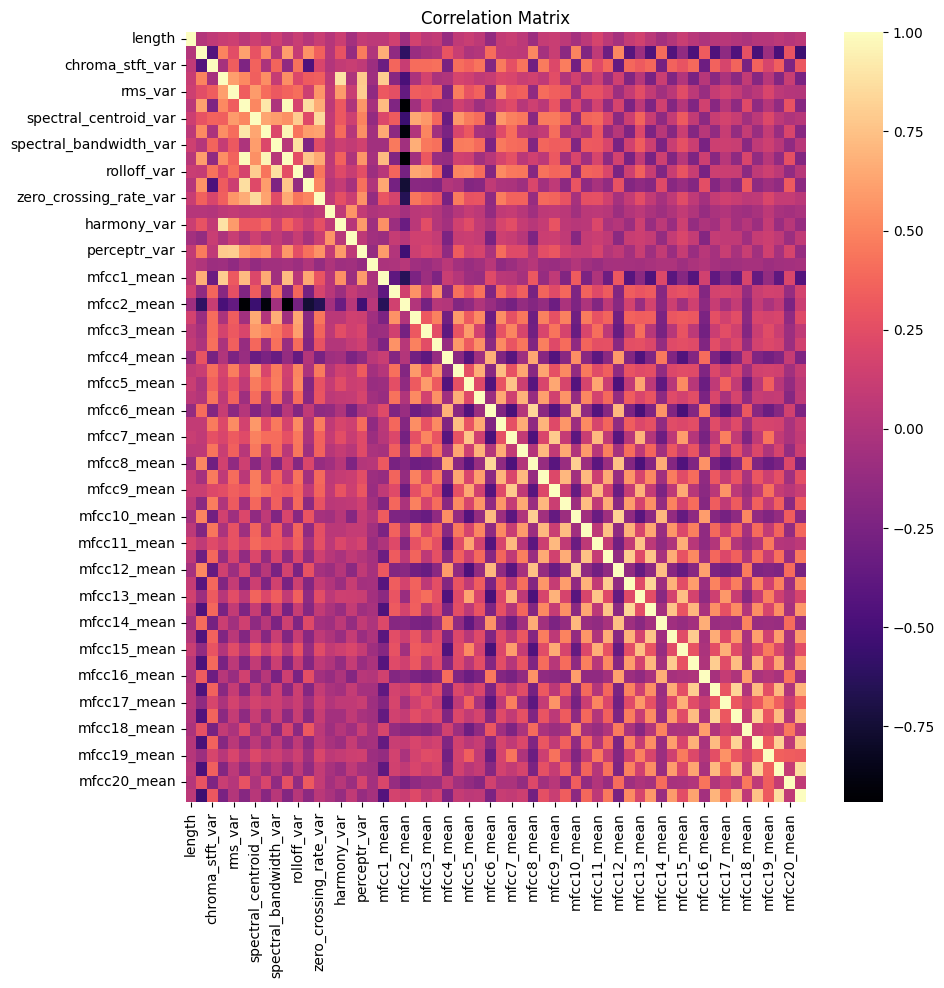

In [100]:
numeric_columns = data.select_dtypes(include=[np.number])

# Corelation matrix with sns
corr = numeric_columns.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='magma')
plt.title('Correlation Matrix')
plt.show()


In [101]:
X = train.drop(columns=['label'])
y = train['label']

X_test = test.drop(columns=['label'])
y_test = test['label']

X = X.drop(columns=['filename'])

X_test = X_test.drop(columns=['filename'])

In [102]:
params = {
    'n_estimators': [10, 25, 50, 100],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [1, 2, 3, 4]
}

gbc = GradientBoostingClassifier()

gs = GridSearchCV(gbc, param_grid=params, cv=5, n_jobs=-1, scoring='recall_macro')

gs.fit(X, y)

gs.predict(X_test)

print(gs.best_params_)
print(gs.best_score_)

report = classification_report(y_test, gs.predict(X_test))
print(report)

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
0.775
              precision    recall  f1-score   support

       blues       0.94      0.75      0.83        20
   classical       0.82      0.90      0.86        20
     country       0.67      0.90      0.77        20
       disco       0.67      0.60      0.63        20
      hiphop       0.71      0.75      0.73        20
        jazz       0.82      0.90      0.86        20
       metal       1.00      0.85      0.92        20
         pop       0.83      0.75      0.79        20
      reggae       0.75      0.75      0.75        20
        rock       0.74      0.70      0.72        20

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



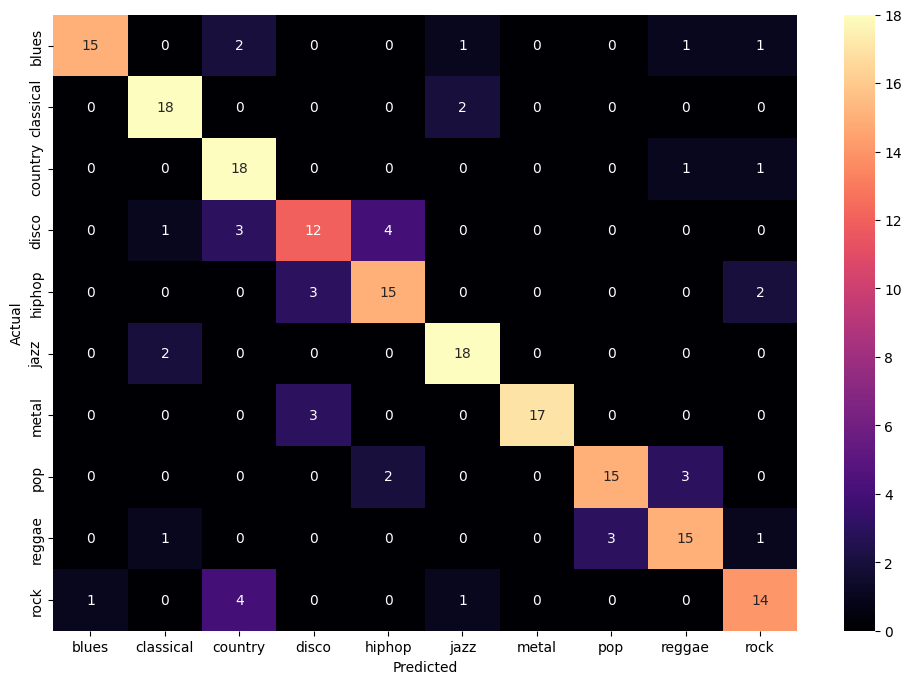

In [103]:
# graphing the decision, what the model predicted vs that actual value
cm = confusion_matrix(y_test, gs.predict(X_test))
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='magma', xticklabels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'], yticklabels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

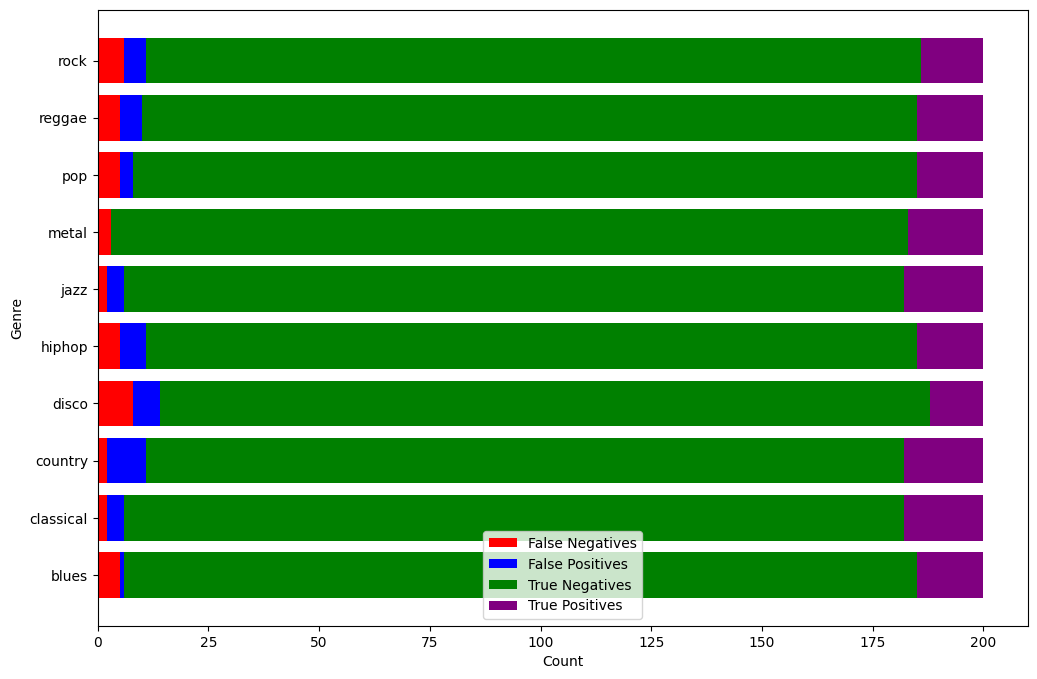

In [104]:
false_negatives = []
false_positives = []
true_negatives = []
true_positives = []

for i in range(10):
    false_negatives.append(cm[i].sum() - cm[i][i])
    false_positives.append(cm[:, i].sum() - cm[i][i])
    true_negatives.append(sum(np.delete(np.delete(cm, i, axis=0), i, axis=1).flatten()))
    true_positives.append(cm[i][i])

plt.figure(figsize=(12, 8))
plt.barh(np.arange(10), false_negatives, color='red', label='False Negatives')
plt.barh(np.arange(10), false_positives, left=false_negatives, color='blue', label='False Positives')
plt.barh(np.arange(10), true_negatives, left=np.add(false_negatives, false_positives), color='green', label='True Negatives')
plt.barh(np.arange(10), true_positives, left=np.add(np.add(false_negatives, false_positives), true_negatives), color='purple', label='True Positives')
plt.yticks(np.arange(10), ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend()
plt.show()